In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [148]:
housing_data = pd.read_excel('./data/HousePricePrediction.xlsx')

In [149]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [150]:
housing_data.shape

(2919, 13)

In [151]:
cat_ = housing_data.dtypes.apply(lambda x: pd.api.types.is_object_dtype(x)) # Returns a 2d series where the first column is the name of the dataframe columns and the second is a true or false relating to if the column's data type matches or not
cat_cols = list(cat_[cat_].index)
print("Categorical variables:",len(cat_cols))
 
int_ = housing_data.dtypes.apply(lambda x: pd.api.types.is_integer_dtype(x))
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl_ = housing_data.dtypes.apply(lambda x: pd.api.types.is_float_dtype(x))
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 6
Float variables: 3


In [152]:
cat_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

<Axes: >

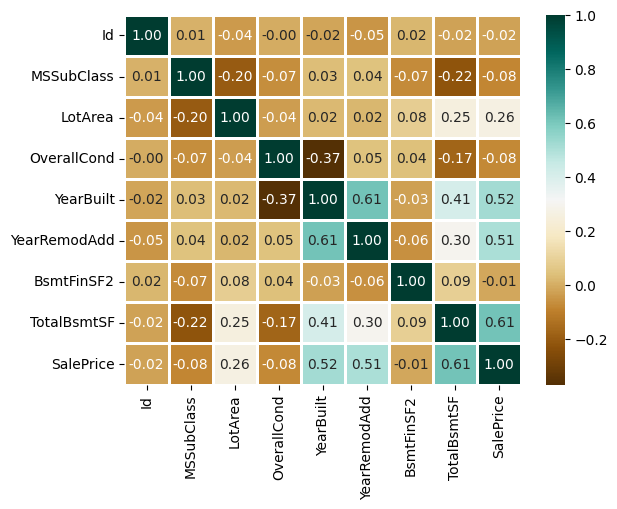

In [153]:
numeric_data = housing_data.select_dtypes(include=[np.number]) # .corr() is struggling to select only numeric fields, so by selecting them manually, the code is able to run.
sns.heatmap(
    numeric_data.corr(),
    cmap = 'BrBG',
    fmt = '.2f',
    linewidths = 2,
    annot = True
)

<Axes: title={'center': 'Number of unique categorical features'}>

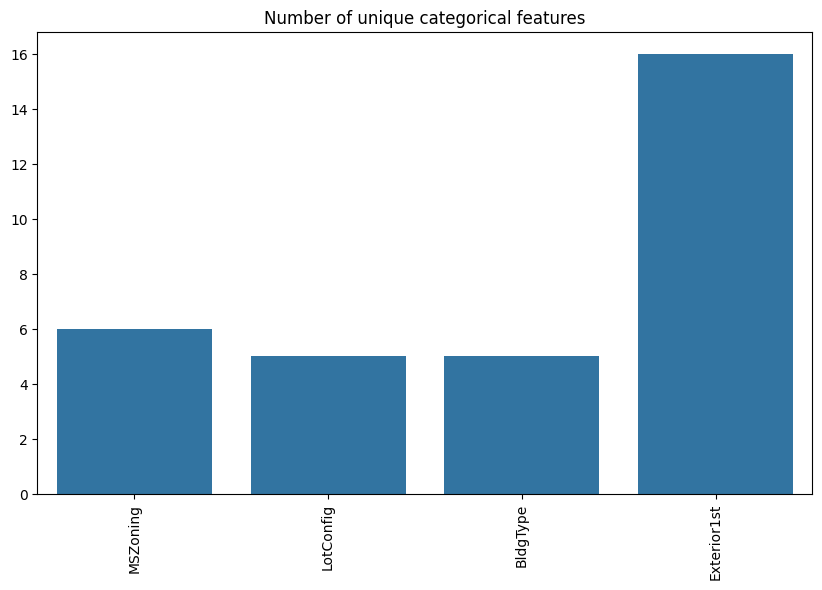

In [154]:
# Get the number of unique values per feature
unique_values = [housing_data[col].unique().size for col in cat_cols]
plt.figure(figsize=(10,6))
plt.title('Number of unique categorical features')
plt.xticks(rotation=90)
sns.barplot(x=cat_cols, y=unique_values)

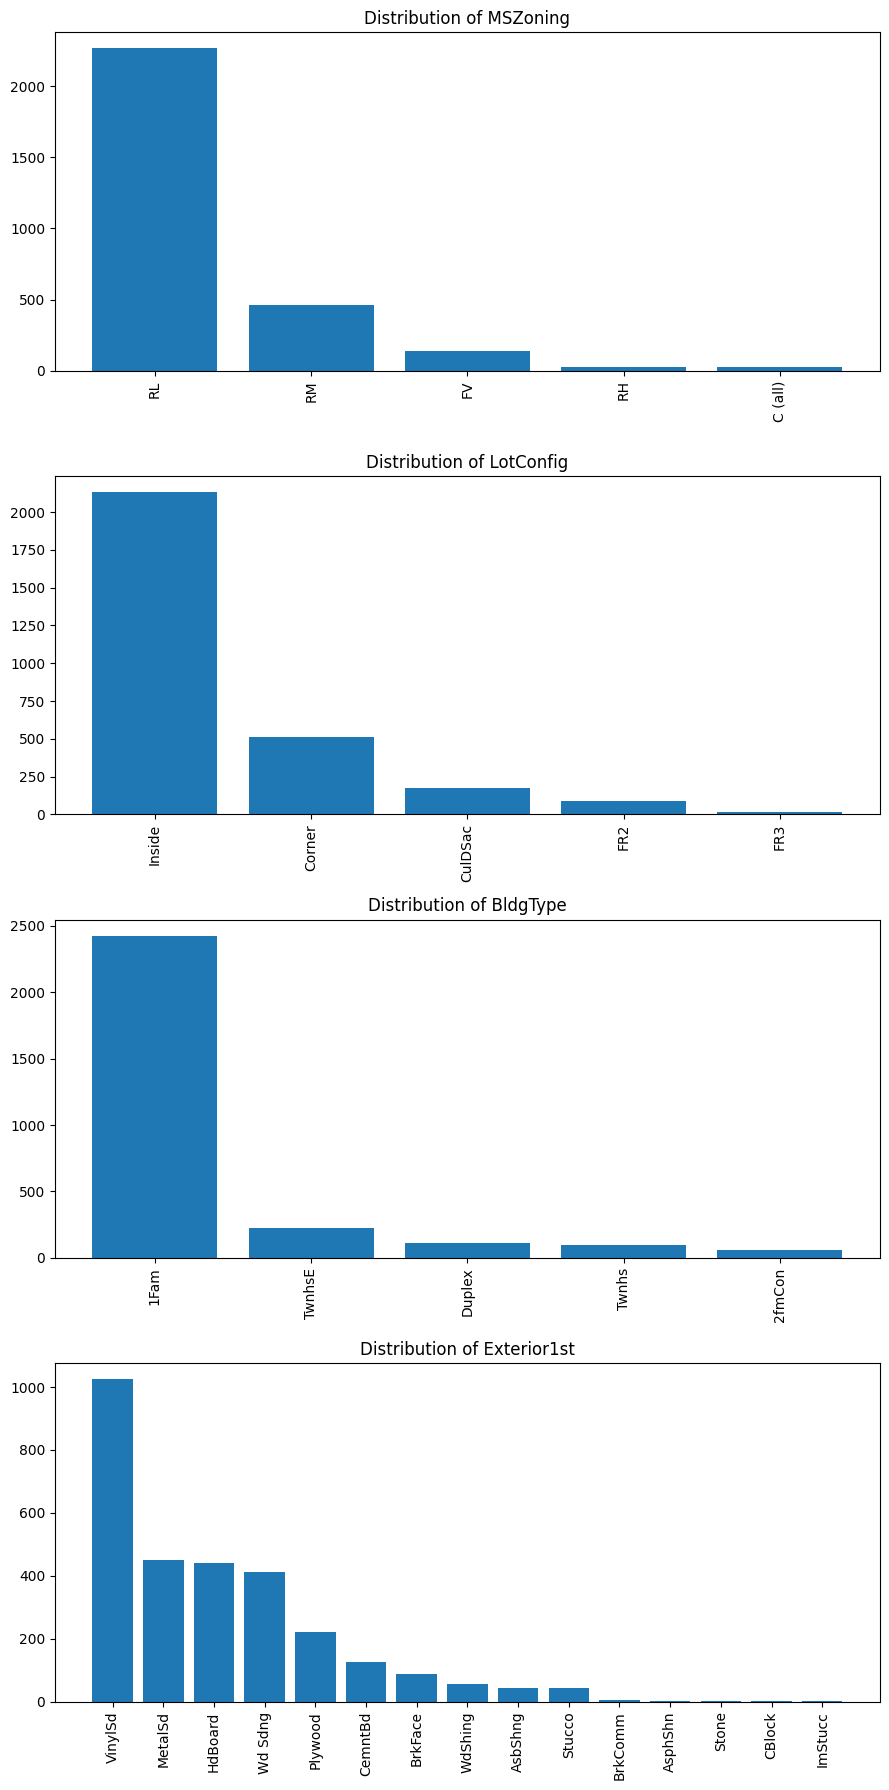

In [155]:
# Get a breakdown of the values per feature
fig, axes = plt.subplots(4, 1, figsize=(9, 18))
axis = 0

for col in housing_data[cat_cols].columns:
    y = housing_data[col].value_counts()
    axes[axis].bar(list(y.index), y)
    axes[axis].set_title(f'Distribution of {col}')
    axes[axis].set_xticks(list(y.index))
    axes[axis].set_xticklabels(list(y.index), rotation=90)
    axis += 1

plt.tight_layout()

In [156]:
# Dropping id field as it is not useful for building a model
housing_data.drop('Id', axis=1, inplace=True)
# Replacing null values with the mean value of the field
housing_data['SalePrice'] = housing_data['SalePrice'].fillna(housing_data['SalePrice'].mean())
# Drop records with null values
data = housing_data.dropna()
data.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [157]:
# Using onehot encoding to convert categorical data to numerical
encoder = OneHotEncoder(sparse_output=False)
enc_cols = pd.DataFrame(encoder.fit_transform(data))
enc_cols.index = data.index
enc_cols.columns = encoder.get_feature_names_out()
df_final = data.drop(cat_cols, axis=1)
df_final = pd.concat([df_final, enc_cols], axis=1)
df_final

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSSubClass_20,MSSubClass_30,...,SalePrice_485000.0,SalePrice_501837.0,SalePrice_538000.0,SalePrice_555000.0,SalePrice_556581.0,SalePrice_582933.0,SalePrice_611657.0,SalePrice_625000.0,SalePrice_745000.0,SalePrice_755000.0
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
df_final.to_csv('./data/processed_data.csv', index=False)